Number of cases with differences in 'Exo': 169
Number of cases with differences in 'Multi': 121
Number of cases with differences in 'discoverymethod': 4316
Number of cases with differences in 'StarMass': 265
Number of cases with differences in 'MaxPMass': 277


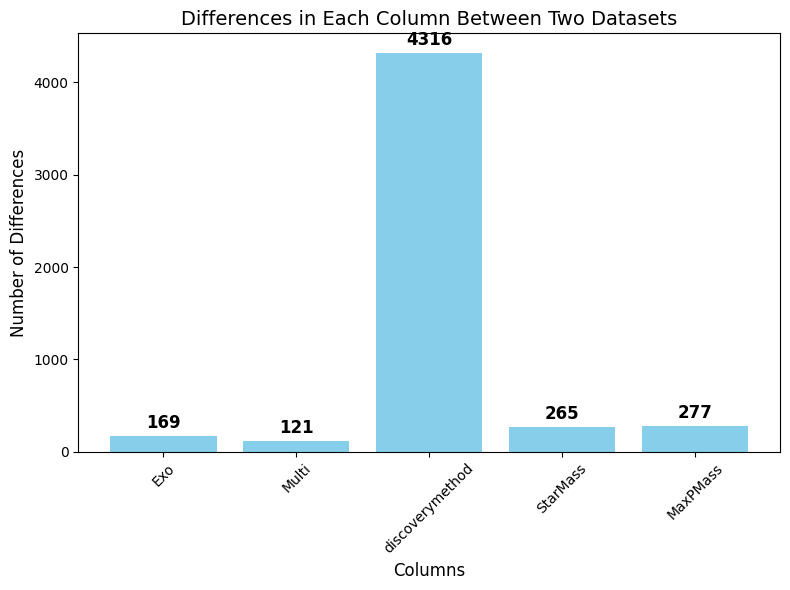

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the two CSV files into DataFrames
df1 = pd.read_csv('combined-dataset.csv')  # First dataset (YW)
df2 = pd.read_csv('hypatia-nonCons-noThickDisk-planets-28Feb-nasa.csv')  # Second dataset (NH)

# Convert 'HIP' columns to the same data type (e.g., strings)
df1['HIP'] = df1['HIP'].astype(str)
df2['HIP'] = df2['HIP'].astype(str)

# Merge the datasets on the 'HIP' column
merged_df = pd.merge(df1, df2, on='HIP', suffixes=('_df1', '_df2'), how='inner')

# List of columns to compare
columns_to_compare = ['Exo', 'Multi', 'discoverymethod', 'StarMass', 'MaxPMass']

# Dictionary to hold difference counts
difference_counts = {}

# Loop through each column and count differences
for column in columns_to_compare:
    diff_mask = merged_df[f'{column}_df1'] != merged_df[f'{column}_df2']
    difference_counts[column] = diff_mask.sum()

# Print the difference counts for each column
for column, count in difference_counts.items():
    print(f"Number of cases with differences in '{column}': {count}")

# Visualization
# Create a bar chart of the differences
plt.figure(figsize=(8, 6))
bars = plt.bar(difference_counts.keys(), difference_counts.values(), color='skyblue')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Differences', fontsize=12)
plt.title('Differences in Each Column Between Two Datasets', fontsize=14)
plt.xticks(rotation=45)

# Add count numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + max(difference_counts.values()) * 0.01,  # Adjust the offset as needed
        int(yval),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()
